In [40]:
import pandas as pd
import numpy as np
import telecontrol_parser as tp
import timeseries_functions as tf
import matplotlib.pyplot as plt
import modelling as mdl
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import tkinter
import plotly

root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

In [41]:
MLdb = mdl.MLdata('../data_sets/feats/')
MLdb.load_datasets()
MLdb.load_lobith_feats()
MLdb.set_dataset(2,features=('lobith_feats',))
# MLdb.set_dataset(2,features=tuple())



In [42]:

    # MLdb.combine_datasets()
    # print(MLdb.datadict[list(MLdb.datadict.keys())[2]])
    # print(MLdb.datadict['ALL'])
    # print(MLdb.get_datasets())
    MLdb.clean_columns()
    MLdb.drop_na()
    MLdb.create_train_test_split(0.8)
    # MLdb.linear_regression()
    MLdb.dataset


OW000-008/WNS3838 - gemeten waarde [°C]  EGV_OPP  \
datetime                                                                
2016-12-21 20:00:00                                      5.8    2.087   
2016-12-21 20:10:00                                      5.8    2.089   
2016-12-21 20:20:00                                      5.8    2.190   
2016-12-21 20:30:00                                      5.8    2.238   
2016-12-21 20:40:00                                      5.8    2.245   
...                                                      ...      ...   
2022-02-10 19:30:00                                      5.9    0.733   
2022-02-10 19:40:00                                      5.9    0.733   
2022-02-10 19:50:00                                      5.9    0.737   
2022-02-10 20:00:00                                      5.9    0.750   
2022-02-10 20:10:00                                      5.9    0.745   

                     OW000-008/WNS3838 - gemeten waarde [°C].1  \
datetime                                                         
2016-12-21 20:00:00                                        5.3   
2016-12-21 20:10:00                                        5.3   
2016-12-21 20:20:00                                        5.3   
2016-12-21 20:30:00                                        5.3   
2016-12-21 20:40:00                                        5.3   
...                                                        ...   
2022-02-10 19:30:00                                        5.4   
2022-02-10 19:40:00                                        5.4   
2022-02-10 19:50:00                                        5.4   
2022-02-10 20:00:00                                        5.4   
2022-02-10 20:10:00                                        5.4   

                     OW000-008/WNS7670 - gemeten waarde [mS/cm].1  hour  \
datetime                                                                  
2016-12-21 20:00:00                                         1.941  20.0   
2016-12-21 20:10:00                                         1.962  20.0   
2016-12-21 20:20:00                                         1.794  20.0   
2016-12-21 20:30:00                                         1.840  20.0   
2016-12-21 20:40:00                                         2.221  20.0   
...                                                           ...   ...   
2022-02-10 19:30:00                                         0.873  19.0   
2022-02-10 19:40:00                                         0.888  19.0   
2022-02-10 19:50:00                                         0.893  19.0   
2022-02-10 20:00:00                                         0.887  20.0   
2022-02-10 20:10:00                                         0.879  20.0   

                     hour_sin  hour_cos  weekday   weekday_sin  weekday_cos  \
datetime                                                                      
2016-12-21 20:00:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
2016-12-21 20:10:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
2016-12-21 20:20:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
2016-12-21 20:30:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
2016-12-21 20:40:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
...                       ...       ...      ...           ...          ...   
2022-02-10 19:30:00 -0.887885  0.460065      3.0  1.224647e-16         -1.0   
2022-02-10 19:40:00 -0.887885  0.460065      3.0  1.224647e-16         -1.0   
2022-02-10 19:50:00 -0.887885  0.460065      3.0  1.224647e-16         -1.0   
2022-02-10 20:00:00 -0.730836  0.682553      3.0  1.224647e-16         -1.0   
2022-02-10 20:10:00 -0.730836  0.682553      3.0  1.224647e-16         -1.0   

                     ...  lobith_debiet_shifted_1296_roll_144_func_sum  \
datetime             ...                                                 
2016-12-21 20:00:00  ...                                    

In [43]:
    MLdb.use_model(modelfunc = LinearRegression)
    model = MLdb.model

0.9033261539465421


In [44]:
print(model)

LinearRegression()


In [45]:
import psutil
psutil.Process().memory_info().rss / (1024*1024)

16000.0703125

In [46]:
y_pred = model.predict(MLdb.test_x)
horizon = 6*6
scale = 0.75
plot = plt.figure(figsize=(scale*1920/my_dpi, scale*1080/my_dpi))
plt.plot(MLdb.test_y.iloc[:,horizon-1],label = 'true')
plt.plot(MLdb.test_x.index,y_pred[:,horizon-1], label = 'prediction')
plt.legend(fontsize = 'xx-large',loc = 'lower right')
plt.title('Model op t + '+str(horizon))
# plt.ylim(0,20)

plotly.tools.mpl_to_plotly(plot)

c:\Users\Admin\Anaconda3\envs\py36_env\lib\site-packages\plotly\matplotlylib\renderer.py:612: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [47]:
# print(MLdb.test_y)
# print(y_pred)
test_y = MLdb.test_y.iloc[:,0].values
pred_y = y_pred[:,0]

# print(mse(MLdb.test_y,y_pred)**(1/2))

In [48]:
len(MLdb.naive_predictive())
# MLdb.test_x

53841

In [49]:
y_pred_naive = MLdb.naive_predictive().to_numpy()

<Figure size 432x288 with 0 Axes>

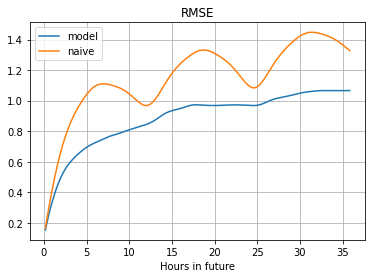

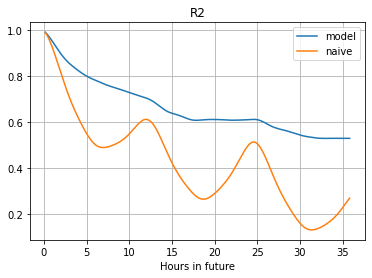

<Figure size 432x288 with 0 Axes>

In [50]:
MSE_list = []
R2_list = []
MSE_list_naive = []
R2_list_naive = []


for i in range(0,MLdb.test_y.shape[1]-1):
    test_y = MLdb.test_y.iloc[:,i].values
    pred_y = y_pred[:,i]
    pred_y_naive = y_pred_naive[:,i]
    MSE_list.append(mse(test_y,pred_y)**(1/2))
    R2_list.append(r2_score(test_y,pred_y))
    MSE_list_naive.append(mse(test_y,pred_y_naive)**(1/2))
    R2_list_naive.append(r2_score(test_y,pred_y_naive))

R2_list = np.array(R2_list).clip(min=0)


x_bereik = [(i*10+10)/60 for i in range(len(R2_list))]
plt.plot(x_bereik,MSE_list,label = 'model')
plt.plot(x_bereik,MSE_list_naive,label = 'naive')
plt.title('RMSE')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()
plt.plot(x_bereik,R2_list,label = 'model')
plt.plot(x_bereik,R2_list_naive, label = 'naive')
plt.title('R2')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()


In [51]:
# TODO